Indonesia Bagian Data:
1. Amjad Adhie
2. Iskandar Muda
3. Raka Admiharfan Fatihah

Import Library

In [399]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf


Dataset

In [400]:
train = pd.read_csv('dataset/train_features.csv')
train.insert(0, 'ID', 0)
train.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [401]:
test_set = pd.read_csv('dataset/test_features.csv')
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [402]:
label = pd.read_csv('dataset/train_labels.csv')
label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [403]:
# Menggabungkan data train dan label
train_set = train.join(label)

# EDA (Exploratory Data Analysis)

In [404]:
# memeriksa setiap kolom dari data train yang kosong
train_set.isnull().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

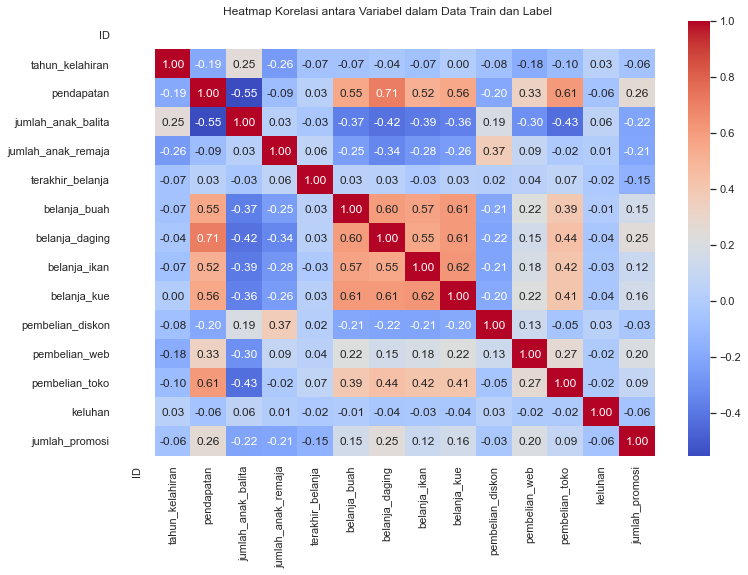

In [405]:
# Menghitung korelasi antara variabel numerik
corr = train_set.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel dalam Data Train dan Label')
plt.show()

In [406]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


## Data Preparation

### Drop Duplicate Data

In [407]:
# drop row has similar value
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 3817
Rows after dropping duplicates: 3817


No duplicate rows in the training data.

In [408]:
# Drop row has all NaN value
print("Rows before dropping all NaN value:", len(train_set))
train_set.dropna(how='all', inplace=True)
print("Rows after dropping all NaN value:", len(train_set))


Rows before dropping all NaN value: 3817
Rows after dropping all NaN value: 3817


In [409]:
# Drop column tanggal_menjadi_anggota
train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4


In [410]:
# Drop column tanggal_menjadi_anggota pada test_set
test_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0


## Split Training Set and Validation Set

In [411]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train_set.copy()

# Split training set and validation set
train_set, val_set = train_test_split(train_set, test_size=0.2, stratify=train_set['jumlah_promosi'], random_state=42)

In [412]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
2329,0,1962,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,3
394,0,1973,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,6
981,0,1951,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,1
1199,0,1966,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,NaN,4.0,0.0,5
3137,0,1959,Sarjana,Menikah,150100639.0,0.0,NaN,46.0,127193.0,307425.0,90571.0,44549.0,NaN,7.0,8.0,0.0,4


In [413]:
print(len(train_set))
print(len(val_set))

3053
764


## Preprocessing

### Handle Missing Values¶

In [414]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053 entries, 2329 to 206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3053 non-null   int64  
 1   tahun_kelahiran     3053 non-null   int64  
 2   pendidikan          2899 non-null   object 
 3   status_pernikahan   2879 non-null   object 
 4   pendapatan          2898 non-null   float64
 5   jumlah_anak_balita  2898 non-null   float64
 6   jumlah_anak_remaja  2904 non-null   float64
 7   terakhir_belanja    2907 non-null   float64
 8   belanja_buah        2912 non-null   float64
 9   belanja_daging      2909 non-null   float64
 10  belanja_ikan        2897 non-null   float64
 11  belanja_kue         2884 non-null   float64
 12  pembelian_diskon    2909 non-null   float64
 13  pembelian_web       2926 non-null   float64
 14  pembelian_toko      2916 non-null   float64
 15  keluhan             2887 non-null   float64
 16  juml

In [415]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2464 to 2265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  764 non-null    int64  
 1   tahun_kelahiran     764 non-null    int64  
 2   pendidikan          729 non-null    object 
 3   status_pernikahan   726 non-null    object 
 4   pendapatan          729 non-null    float64
 5   jumlah_anak_balita  729 non-null    float64
 6   jumlah_anak_remaja  709 non-null    float64
 7   terakhir_belanja    738 non-null    float64
 8   belanja_buah        724 non-null    float64
 9   belanja_daging      730 non-null    float64
 10  belanja_ikan        727 non-null    float64
 11  belanja_kue         719 non-null    float64
 12  pembelian_diskon    730 non-null    float64
 13  pembelian_web       726 non-null    float64
 14  pembelian_toko      732 non-null    float64
 15  keluhan             734 non-null    float64
 16  juml

In [416]:
# Split numerical and categorical variables
num_feat = train_set.select_dtypes(include=['int', 'float'])
cat_feat = train_set.select_dtypes(include=['object'])

num_feat_val = val_set.select_dtypes(include=['int', 'float'])
cat_feat_val = val_set.select_dtypes(include=['object'])

In [417]:
def feat_null_pct(num, data):
    missing = num.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

print("Missing numerical train data: ")
feat_null_pct(num_feat, train_set)
print()
print("Missing categorical train data:")
feat_null_pct(cat_feat, train_set)

Missing numerical train data: 
belanja_kue Null Values: 5.54% of the dataset (169)
keluhan Null Values: 5.44% of the dataset (166)
belanja_ikan Null Values: 5.11% of the dataset (156)
jumlah_anak_balita Null Values: 5.08% of the dataset (155)
pendapatan Null Values: 5.08% of the dataset (155)
jumlah_anak_remaja Null Values: 4.88% of the dataset (149)
terakhir_belanja Null Values: 4.78% of the dataset (146)
pembelian_diskon Null Values: 4.72% of the dataset (144)
belanja_daging Null Values: 4.72% of the dataset (144)
belanja_buah Null Values: 4.62% of the dataset (141)
pembelian_toko Null Values: 4.49% of the dataset (137)
pembelian_web Null Values: 4.16% of the dataset (127)

Missing categorical train data:
status_pernikahan Null Values: 5.7% of the dataset (174)
pendidikan Null Values: 5.04% of the dataset (154)


In [418]:
print("Missing numerical validation data: ")
feat_null_pct(num_feat_val, val_set)
print()
print("Missing categorical validation data:")
feat_null_pct(cat_feat_val, val_set)

Missing numerical validation data: 
jumlah_anak_remaja Null Values: 7.2% of the dataset (55)
belanja_kue Null Values: 5.89% of the dataset (45)
belanja_buah Null Values: 5.24% of the dataset (40)
pembelian_web Null Values: 4.97% of the dataset (38)
belanja_ikan Null Values: 4.84% of the dataset (37)
jumlah_anak_balita Null Values: 4.58% of the dataset (35)
pendapatan Null Values: 4.58% of the dataset (35)
pembelian_diskon Null Values: 4.45% of the dataset (34)
belanja_daging Null Values: 4.45% of the dataset (34)
pembelian_toko Null Values: 4.19% of the dataset (32)
keluhan Null Values: 3.93% of the dataset (30)
terakhir_belanja Null Values: 3.4% of the dataset (26)

Missing categorical validation data:
status_pernikahan Null Values: 4.97% of the dataset (38)
pendidikan Null Values: 4.58% of the dataset (35)


In [419]:
# Create custom imputer class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class FeatureImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):

        # Impute pendidikan column
        self.pendidikan_imputer = SimpleImputer(strategy='most_frequent')
        self.pendidikan_imputer.fit(X[['pendidikan']])

        # Impute status_pernikahan column
        self.status_pernikahan_imputer = SimpleImputer(strategy="most_frequent")
        self.status_pernikahan_imputer.fit(X[['status_pernikahan']])

        # Impute keluhan column with modus
        self.keluhan_imputer = SimpleImputer(strategy='most_frequent')
        self.keluhan_imputer.fit(X[['keluhan']])
        
        # Impute jumlah_anak_remaja column
        self.jumlah_anak_remaja_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_remaja_imputer.fit(X[['jumlah_anak_remaja']])

        # Impute jumlah_anak_balita column
        self.jumlah_anak_balita_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_balita_imputer.fit(X[['jumlah_anak_balita']])

        # Impute belanja_kue column with median
        self.belanja_kue_imputer = SimpleImputer(strategy='median')
        self.belanja_kue_imputer.fit(X[['belanja_kue']])

        # Impute belanja_daging column with median
        self.belanja_daging_imputer = SimpleImputer(strategy='median')
        self.belanja_daging_imputer.fit(X[['belanja_daging']])

        # Impute belanja_ikan column with median
        self.belanja_ikan_imputer = SimpleImputer(strategy='median')
        self.belanja_ikan_imputer.fit(X[['belanja_ikan']])

        # Impute belanja_buah column with median
        self.belanja_buah_imputer = SimpleImputer(strategy='median')
        self.belanja_buah_imputer.fit(X[['belanja_buah']])

        # Impute pembelian_diskon column with median
        self.pembelian_diskon_imputer = SimpleImputer(strategy='median')
        self.pembelian_diskon_imputer.fit(X[['pembelian_diskon']])

        # Impute pembelian_web column with median
        self.pembelian_web_imputer = SimpleImputer(strategy='median')
        self.pembelian_web_imputer.fit(X[['pembelian_web']])

        # Impute pembelian_toko column with median
        self.pembelian_toko_imputer = SimpleImputer(strategy='median')
        self.pembelian_toko_imputer.fit(X[['pembelian_toko']])

        # Impute pendapatan column with median
        self.pendapatan_imputer = SimpleImputer(strategy='median')
        self.pendapatan_imputer.fit(X[['pendapatan']])

        # Impute terakhir_belanja column with median
        self.terakhir_belanja_imputer = SimpleImputer(strategy='median')
        self.terakhir_belanja_imputer.fit(X[['terakhir_belanja']])

        
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        # Apply imputation to the '
        X_imputed['pendidikan'] = self.pendidikan_imputer.transform(X[['pendidikan']])
        X_imputed['status_pernikahan'] = self.status_pernikahan_imputer.transform(X[['status_pernikahan']])
        X_imputed['keluhan'] = self.keluhan_imputer.transform(X[['keluhan']])
        X_imputed['jumlah_anak_remaja'] = self.jumlah_anak_remaja_imputer.transform(X[['jumlah_anak_remaja']])
        X_imputed['jumlah_anak_balita'] = self.jumlah_anak_balita_imputer.transform(X[['jumlah_anak_balita']])
        X_imputed['belanja_kue'] = self.belanja_kue_imputer.transform(X[['belanja_kue']])
        X_imputed['belanja_daging'] = self.belanja_daging_imputer.transform(X[['belanja_daging']])
        X_imputed['belanja_ikan'] = self.belanja_ikan_imputer.transform(X[['belanja_ikan']])
        X_imputed['belanja_buah'] = self.belanja_buah_imputer.transform(X[['belanja_buah']])
        X_imputed['pembelian_diskon'] = self.pembelian_diskon_imputer.transform(X[['pembelian_diskon']])
        X_imputed['pembelian_web'] = self.pembelian_web_imputer.transform(X[['pembelian_web']])
        X_imputed['pembelian_toko'] = self.pembelian_toko_imputer.transform(X[['pembelian_toko']])
        X_imputed['pendapatan'] = self.pendapatan_imputer.transform(X[['pendapatan']])
        X_imputed['terakhir_belanja'] = self.terakhir_belanja_imputer.transform(X[['terakhir_belanja']])
               
        return X_imputed

### Feature Creation¶

In [420]:
n_promosi = 7
most_freq_promosi = train_set['jumlah_promosi'].value_counts()[:n_promosi].index
train_set['jumlah_promosi'].value_counts()[:n_promosi]

0    786
5    445
1    412
4    412
3    378
2    311
6    309
Name: jumlah_promosi, dtype: int64

In [421]:
n_pendidikan = 7
most_freq_pendidikan= train_set['pendidikan'].value_counts()[:n_pendidikan].index
train_set['pendidikan'].value_counts()[:n_pendidikan]

Sarjana     1450
Magister     692
SMA          345
Doktor       338
SMP           72
5              2
Name: pendidikan, dtype: int64

In [422]:
# drop row where pendidikan = 5
train_set = train_set[train_set['pendidikan'] != '5']

In [423]:
n_status_pernikahan = 6
most_freq_status_pernikahan= train_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
train_set['status_pernikahan'].value_counts()[:n_status_pernikahan]

Rencana Menikah    1025
Menikah             901
Sendiri             744
Cerai               175
Cerai Mati           31
5                     1
Name: status_pernikahan, dtype: int64

In [424]:
# drop row where status_pernikahan = 5
train_set = train_set[train_set['status_pernikahan'] != '5']

### Encode Categorical Features

In [425]:
# Create custom encoder class
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Perform one-hot encoding
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

            # Drop original categorical columns from DataFrame
            X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

### Remove Outliers¶
This step is to remove outliers based on a column using the IQR method.

In [426]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

### Handle Imbalances

In [427]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=y.value_counts().index)
    
    print(y.value_counts())
    print()

Sarjana     1450
Magister     692
SMA          345
Doktor       337
SMP           72
Name: pendidikan, dtype: int64



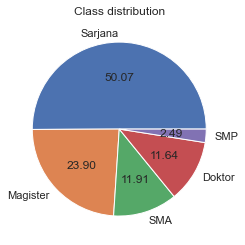

In [428]:
plot_classes(train_set['pendidikan'])

In [429]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

## Prepare Training and Validation set
All of the preprocessing steps will be compiled in this section.

### Fitting the Pipeline¶
We will pass down the training and validation set through a pipeline that performs the preprocessing steps defined before.

In [430]:
from sklearn.pipeline import Pipeline

pipeline_val = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])


In [431]:
train_set = pipeline_val.fit_transform(train_set)
val_set = pipeline_val.transform(val_set)
testing_set = pipeline_val.transform(test_set)

In [432]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [433]:
print(len(train_set))

3050


In [434]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,0,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,0,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,0,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,0,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


In [435]:
print(len(val_set))

764


In [436]:
null_test = val_set.columns[val_set.isnull().any()]
print(val_set[null_test].isnull().sum())

Series([], dtype: float64)


### Matching the Train and Validation Columns¶
Columns need to be matched between the train and validation set as there may be columns that exists in the validation set but not in the training set, and vice versa.

In [437]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()
    
    # Get list of columns in test set
    test_cols = test.columns.tolist()
    
    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)
    
    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0
    
    # Reorder columns in test set to match training set
    test = test[train_cols]
    
    # Return modified test set
    return test

In [438]:
# Match the columns
val_set = match_columns(train_set, val_set)

In [439]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [440]:
val_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,0,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,0,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,0,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,0,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


Below, we examine each column's correlation to the target variable after preprocessing.

In [441]:
train_set.corr()['jumlah_promosi'].sort_values(ascending=False)


jumlah_promosi                       1.000000
pendapatan                           0.253584
belanja_daging                       0.238128
pembelian_web                        0.190209
belanja_kue                          0.142009
belanja_buah                         0.140980
belanja_ikan                         0.103910
pendidikan_Magister                  0.094548
pembelian_toko                       0.083992
status_pernikahan_Rencana Menikah    0.076795
pendidikan_Sarjana                   0.064384
status_pernikahan_Sendiri            0.048017
pembelian_diskon                    -0.029109
status_pernikahan_Cerai Mati        -0.033053
status_pernikahan_Cerai             -0.055020
tahun_kelahiran                     -0.068279
keluhan                             -0.075472
pendidikan_SMA                      -0.078361
status_pernikahan_Menikah           -0.092104
pendidikan_Doktor                   -0.097732
pendidikan_SMP                      -0.107287
terakhir_belanja                  

### Apply Resampling
Oversampling the data as explained before.

In [442]:
# Split predictor and target variable
X_train = train_set.drop(['jumlah_promosi'], axis=1)
y_train = train_set['jumlah_promosi']

In [443]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

3    783
6    783
2    783
5    783
1    783
4    783
0    783
Name: jumlah_promosi, dtype: int64



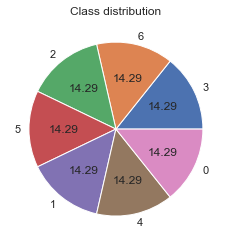

In [444]:
# Plot class distribution after resampling
plot_classes(y_train)

In [445]:
# Split predictor and target variable for validation set
X_val = val_set.drop(['jumlah_promosi'], axis=1)
y_val = val_set['jumlah_promosi']

In [446]:
X_train.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
0,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
1,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
2,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
3,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
4,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0


In [447]:
X_val.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2464,0,1957,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,...,0,0,0,0,1,0,0,0,0,1
480,0,1976,140988476.0,0.0,0.0,45.0,102826.0,804331.0,52446.0,44966.0,...,0,0,0,0,1,0,0,0,1,0
2368,0,1979,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,...,0,0,0,0,1,0,0,0,1,0
3457,0,1977,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,...,0,0,0,0,1,0,0,0,1,0
503,0,1972,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,...,0,0,0,0,1,0,0,0,0,1


### Implement Classifiers¶
In this section, we will implement classifiers to train on.

In [448]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

def train_clf(X_train, y_train, **kwargs):
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, **kwargs)
    xgb = XGBClassifier(random_state=42)
    
    # Create the StackingClassifier with a Logistic Regression final estimator
    stacked_classifier = StackingClassifier(
        estimators=[
            ('rf', rfc),
            ('xgb', xgb)
        ],
        final_estimator=LogisticRegression(),
        cv=5,  # Number of cross-validation folds
        n_jobs=-1
    )
    
    stacked_classifier.fit(X_train, y_train)

    return stacked_classifier

I have experimented with different classifiers, including Random Forest, XGBoost, CatBoost, and Ensemble Methods. Based on my previous trials, the Stacking model has shown the best performance across all scoring metrics. Therefore, we will focus solely on building and tuning the Stacking model for the remainder of this project to save time and computational resources.

### Evaluation¶
In this section, we will evaluate the performance of our classifier on the training and validation set.

### Training Set Score

In [449]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

params = {'class_weight': 'balanced'}
clf = train_clf(X_train, y_train, **params)
y_pred_train_clf = clf.predict(X_train)

In [450]:
from sklearn.metrics import classification_report

print(f"{clf.__class__.__name__} Training Set Score")
print()
print(classification_report(y_pred_train_clf, y_train))

StackingClassifier Training Set Score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       783
           2       1.00      1.00      1.00       783
           3       1.00      1.00      1.00       783
           4       1.00      1.00      1.00       783
           5       1.00      1.00      1.00       783
           6       1.00      1.00      1.00       783

    accuracy                           1.00      5481
   macro avg       1.00      1.00      1.00      5481
weighted avg       1.00      1.00      1.00      5481



### Validation Set Score¶

In [451]:
y_pred_val_clf = clf.predict(X_val)
y_pred_val_clf

array([0, 2, 3, 3, 5, 4, 2, 1, 0, 0, 0, 4, 6, 3, 0, 3, 2, 2, 2, 5, 0, 0,
       0, 2, 5, 3, 3, 0, 2, 3, 6, 5, 5, 3, 4, 0, 1, 6, 4, 5, 3, 6, 1, 2,
       0, 0, 5, 5, 0, 1, 5, 0, 3, 6, 6, 4, 1, 5, 4, 3, 6, 6, 6, 6, 4, 2,
       5, 1, 3, 0, 1, 4, 5, 0, 0, 0, 6, 0, 0, 5, 2, 4, 5, 0, 0, 3, 6, 0,
       5, 0, 5, 1, 3, 5, 3, 2, 2, 0, 1, 3, 0, 6, 0, 0, 0, 0, 5, 1, 0, 1,
       0, 2, 1, 3, 2, 5, 3, 4, 0, 4, 1, 1, 4, 3, 6, 1, 0, 4, 5, 0, 5, 0,
       1, 2, 0, 6, 0, 6, 0, 0, 1, 0, 0, 0, 0, 6, 4, 3, 3, 5, 5, 3, 0, 1,
       3, 0, 4, 3, 2, 6, 6, 4, 5, 0, 0, 5, 0, 1, 5, 4, 0, 5, 2, 4, 4, 1,
       0, 0, 0, 3, 5, 3, 1, 0, 2, 0, 0, 1, 4, 0, 0, 0, 6, 2, 1, 5, 0, 2,
       3, 0, 6, 4, 5, 4, 6, 1, 0, 5, 2, 1, 6, 0, 6, 5, 1, 0, 0, 5, 1, 0,
       6, 3, 1, 5, 1, 3, 0, 6, 6, 2, 1, 0, 4, 5, 2, 1, 2, 0, 1, 0, 6, 1,
       3, 0, 0, 3, 0, 5, 4, 4, 5, 5, 5, 0, 4, 4, 5, 4, 0, 4, 4, 5, 5, 4,
       5, 0, 0, 3, 0, 0, 0, 4, 0, 3, 0, 4, 4, 0, 3, 5, 3, 2, 2, 3, 5, 0,
       0, 2, 4, 0, 6, 3, 5, 4, 0, 0, 0, 3, 1, 0, 3,

In [452]:
print(f"{clf.__class__.__name__} Validation Set Score")
print()
print(classification_report(y_val, y_pred_val_clf))

StackingClassifier Validation Set Score

              precision    recall  f1-score   support

           0       0.61      0.76      0.68       197
           1       0.57      0.46      0.51       103
           2       0.69      0.63      0.66        78
           3       0.91      0.88      0.90        94
           4       0.93      0.85      0.89       103
           5       0.91      0.93      0.92       112
           6       0.84      0.73      0.78        77

    accuracy                           0.76       764
   macro avg       0.78      0.75      0.76       764
weighted avg       0.76      0.76      0.75       764



### ROC Curve¶

In [453]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_ovr_roc_curve(y_true, y_prob):
    n_classes = y_prob.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot ROC curves
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-versus-Rest ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [454]:
# Predict probabilities for test set
y_prob = clf.predict_proba(X_val)

# Get true labels for test set
n_samples = y_prob.shape[0]
n_classes = clf.classes_.shape[0]
y_true = np.zeros((n_samples, n_classes))
for i in range(n_samples):
    true_label = y_val.values[i]
    y_true[i, true_label] = 1

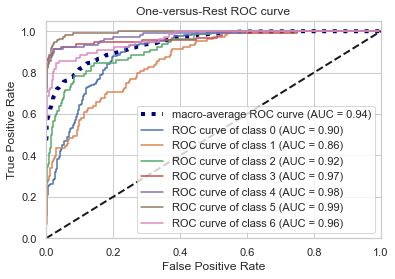

In [455]:
plot_ovr_roc_curve(y_true, y_prob)

### Prepare the Full Training Set¶
In this section, we will pass down the whole training set through the preprocessing pipeline and training the models on the entire resampled training set.

In [456]:
# Create new pipeline object to fit on the original training set
pipeline_c = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

pipeline_r = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

### Final Strategy¶
We will preprocess the dataset separately for each hotel types. The machine learning model will also be trained on each of the segregated dataset.

In [459]:
# Retrieve original training set
# Split based on 'pendidikan' that has ['SMA', 'SMP', 'Sarjana', 'Magister', 'Doctor']

final_train = train_set_ori

# Split training set based on 'pendidikan'
train_sma = final_train[final_train['pendidikan'] == 'SMA']
train_smp = final_train[final_train['pendidikan'] == 'SMP']
train_sarjana = final_train[final_train['pendidikan'] == 'Sarjana']
train_magister = final_train[final_train['pendidikan'] == 'Magister']
train_doktor = final_train[final_train['pendidikan'] == 'Doktor']

test_sma = test_set[test_set['pendidikan'] == 'SMA']
test_smp = test_set[test_set['pendidikan'] == 'SMP']
test_sarjana = test_set[test_set['pendidikan'] == 'Sarjana']
test_magister = test_set[test_set['pendidikan'] == 'Magister']
test_doktor = test_set[test_set['pendidikan'] == 'Doktor']

# Fit pipeline on each training set
train_sma = pipeline_c.fit_transform(train_sma)
train_smp = pipeline_c.fit_transform(train_smp)
train_sarjana = pipeline_c.fit_transform(train_sarjana)
train_magister = pipeline_c.fit_transform(train_magister)
train_doktor = pipeline_c.fit_transform(train_doktor)

# Fit pipeline on test set
test_sma = pipeline_r.fit_transform(test_sma)
test_smp = pipeline_r.fit_transform(test_smp)
test_sarjana = pipeline_r.fit_transform(test_sarjana)
test_magister = pipeline_r.fit_transform(test_magister)
test_doktor = pipeline_r.fit_transform(test_doktor)

# match the column
train_sma = match_columns(train_set, train_sma)
train_smp = match_columns(train_set, train_smp)
train_sarjana = match_columns(train_set, train_sarjana)
train_magister = match_columns(train_set, train_magister)
train_doktor = match_columns(train_set, train_doktor)

# match the column on test
test_sma = match_columns(train_set, test_sma)
test_smp = match_columns(train_set, test_smp)
test_sarjana = match_columns(train_set, test_sarjana)
test_magister = match_columns(train_set, test_magister)
test_doktor = match_columns(train_set, test_doktor)


# # Drop target variable from each training set
# train_sma.drop('jumlah_promosi', axis=1, inplace=True)
# train_smp.drop('jumlah_promosi', axis=1, inplace=True)
# train_sarjana.drop('jumlah_promosi', axis=1, inplace=True)
# train_magister.drop('jumlah_promosi', axis=1, inplace=True)
# train_doktor.drop('jumlah_promosi', axis=1, inplace=True)

# # Drop target variable from each test set
# test_sma.drop('jumlah_promosi', axis=1, inplace=True)
# test_smp.drop('jumlah_promosi', axis=1, inplace=True)
# test_sarjana.drop('jumlah_promosi', axis=1, inplace=True)
# test_magister.drop('jumlah_promosi', axis=1, inplace=True)
# test_doktor.drop('jumlah_promosi', axis=1, inplace=True)

# Split predictor and target variable
X_train_sma = train_sma.drop(['jumlah_promosi'], axis=1)
y_train_sma = train_sma['jumlah_promosi']

X_train_smp = train_smp.drop(['jumlah_promosi'], axis=1)
y_train_smp = train_smp['jumlah_promosi']

X_train_sarjana = train_sarjana.drop(['jumlah_promosi'], axis=1)
y_train_sarjana = train_sarjana['jumlah_promosi']

X_train_magister = train_magister.drop(['jumlah_promosi'], axis=1)
y_train_magister = train_magister['jumlah_promosi']

X_train_doktor = train_doktor.drop(['jumlah_promosi'], axis=1)
y_train_doktor = train_doktor['jumlah_promosi']


In [473]:
X_train_smp.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
0,0,1979,14967000.0,0.0,0.0,65.0,34391.0,30345.0,32368.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,0,1975,51622455.0,1.0,0.0,28.0,12079.0,25316.0,39202.0,19935.0,...,0,0,0,1,0,0,0,0,0,1
2,0,1979,53711000.0,1.0,0.0,27.0,18207.0,18207.0,28322.0,22253.0,...,0,0,0,1,0,0,0,0,1,0
3,0,1970,28403856.0,0.0,0.0,30.0,9353.0,25537.0,30789.0,17214.0,...,0,0,0,1,0,0,0,1,0,0
4,0,1973,32094051.0,1.0,0.0,67.0,3061.0,8026.0,37409.0,94950.0,...,0,0,0,1,0,0,0,1,0,0


In [461]:
# Handle imbalances
X_train_sma, y_train_sma = balance_classes(X_train_sma, y_train_sma)
X_train_smp, y_train_smp = balance_classes(X_train_smp, y_train_smp)
X_train_sarjana, y_train_sarjana = balance_classes(X_train_sarjana, y_train_sarjana)
X_train_magister, y_train_magister = balance_classes(X_train_magister, y_train_magister)
X_train_doktor, y_train_doktor = balance_classes(X_train_doktor, y_train_doktor)


### Cross Validation¶
In this section, we will perform a 5-fold cross validation on the training set.

In [462]:
from sklearn.model_selection import StratifiedKFold

def evaluate_model(train_func, X, y, average, **params):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc = 0
    prec = 0
    rec = 0
    f1 = 0
    
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)
        
        # Train and predict on the test data
        clf = train_func(X_train_res, y_train_res, **params)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
        print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
        print(f"F1-score: {f1_score(y_test, y_pred, average=average)}")
        print()
        
        acc += accuracy_score(y_test, y_pred)
        prec += precision_score(y_test, y_pred, average=average)
        rec += recall_score(y_test, y_pred, average=average)
        f1 += f1_score(y_test, y_pred, average=average)
    
    print("Averages")
    print(f"Accuracy: {acc / 5}")
    print(f"Precision: {prec / 5}")
    print(f"Recall: {rec / 5}")
    print(f"F1-score: {f1 / 5}")
    print()
    

In [463]:
# evaluate_model(train_clf, X_train.values, y_train.values, 'macro', **{'class_weight': 'balanced'})

Cross Validation is done out of this notebook as it is computationally expensive with the current model.

Based on the provided performance metrics for a cross-validation on the model, the average accuracy achieved is 0.8544. Meanwhile the average precision and recall scores achieved were 0.856 and 0.85, respectively, while the average F1-score is 0.85. These metrics suggest that the model is performing reasonably well, but there may be room for improvement.

## Train Classifier on Each Training Set¶
Fitting the base classifier to the training set for both city and resort hotel types.

In [464]:
# Train Classifier
params = {'class_weight': 'balanced'}
clf_smp = train_clf(X_train_smp, y_train_smp, **params)
clf_sarjana = train_clf(X_train_sarjana, y_train_sarjana, **params)
clf_magister = train_clf(X_train_magister, y_train_magister, **params)
clf_doktor = train_clf(X_train_doktor, y_train_doktor, **params)
clf_sma = train_clf(X_train_sma, y_train_sma, **params)


### Analyze Feature Importance¶
In this section, we will analyze feature importance for the trained classifier.

In [465]:
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    # Create a DataFrame using a dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    # Sort the DataFrame in descending order of feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    # Select the top ten most significant features
    fi_df = fi_df.head(10)
    
    # Define plot style
    sns.set(style="whitegrid")

    # Plot feature importance
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=fi_df.feature_importance, y=fi_df.feature_names, palette="rocket")
    plt.title(f"{model_type} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

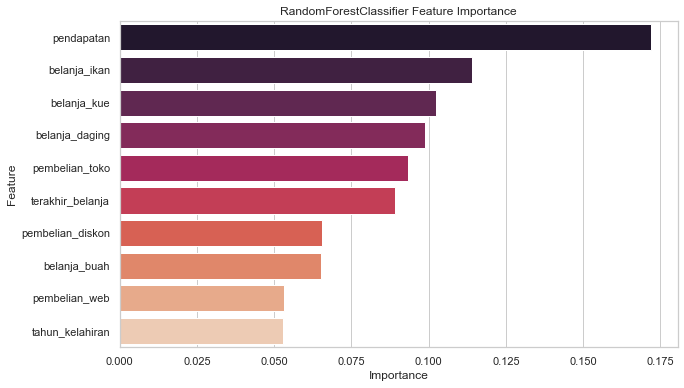

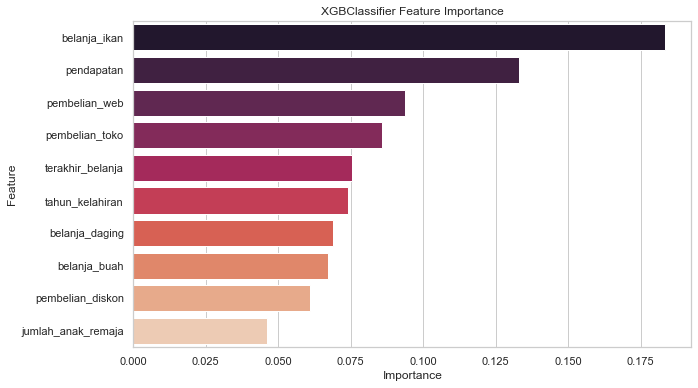

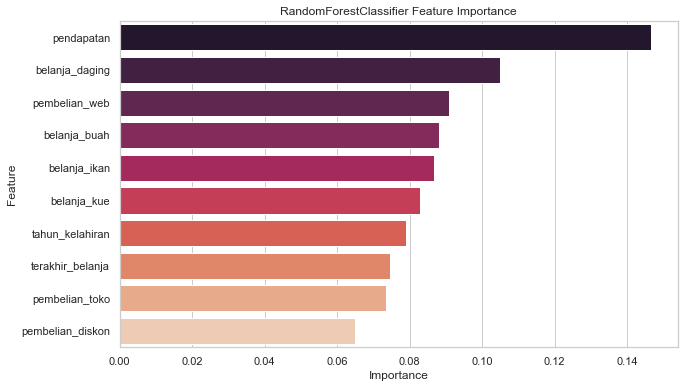

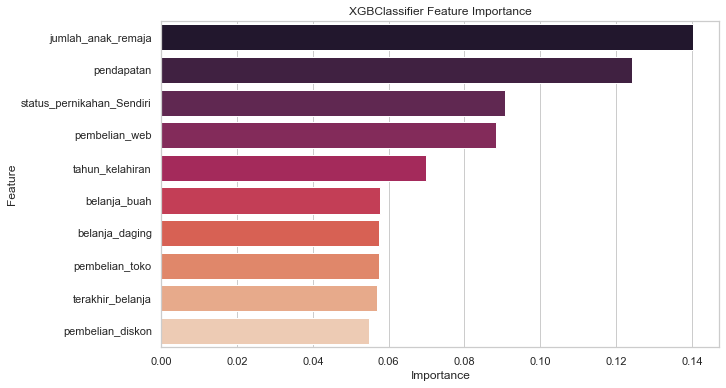

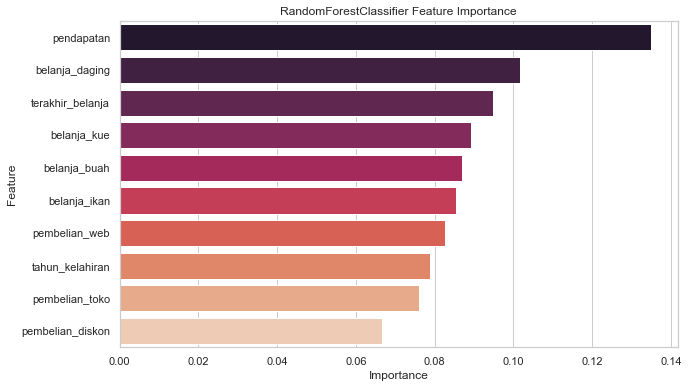

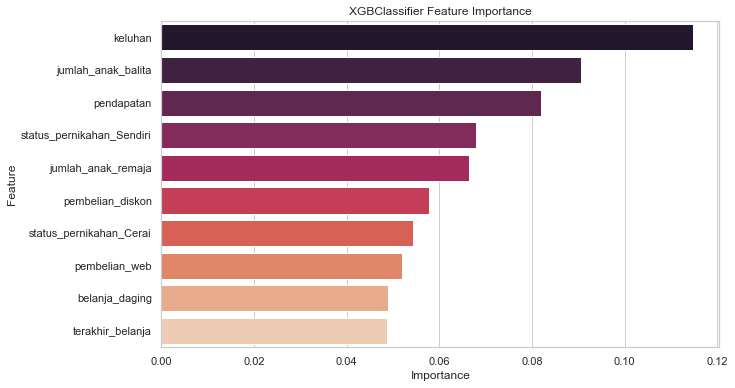

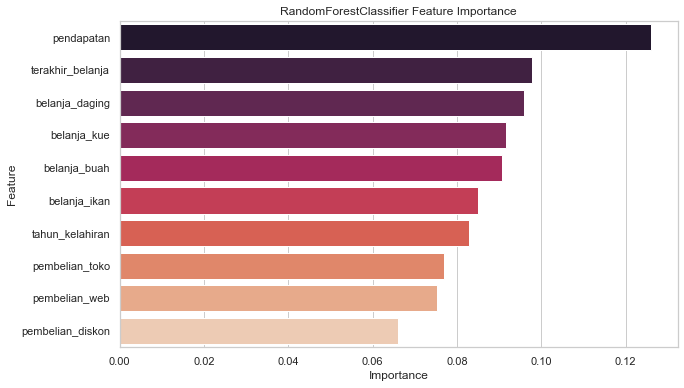

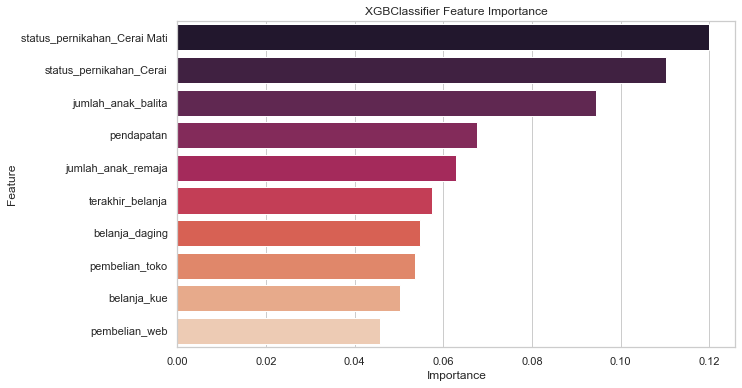

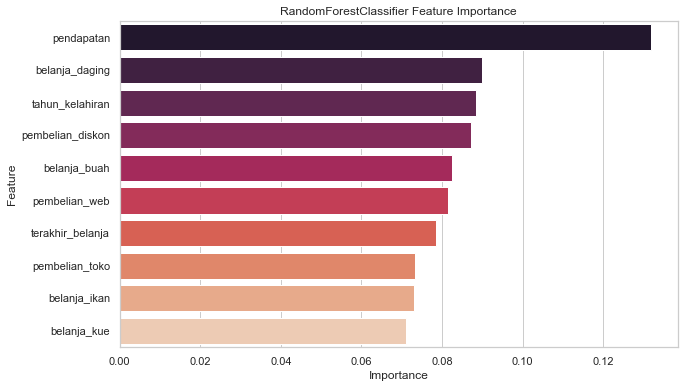

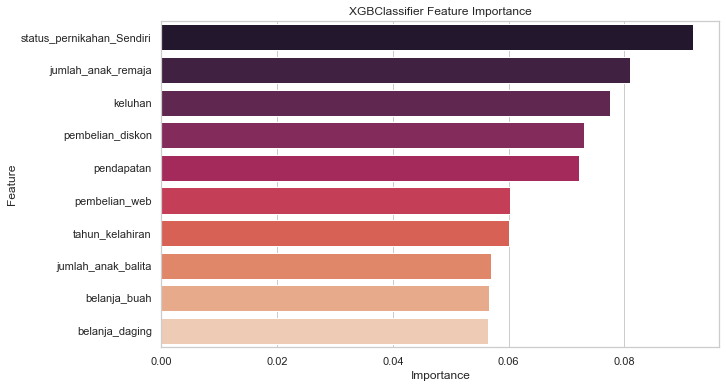

In [466]:
for est in clf_smp.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_smp.columns, est.__class__.__name__)
    
for est in clf_sma.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_sma.columns, est.__class__.__name__)

for est in clf_sarjana.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_sarjana.columns, est.__class__.__name__)

for est in clf_magister.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_magister.columns, est.__class__.__name__)

for est in clf_doktor.estimators_:
    plot_feature_importance(est.feature_importances_, X_train_doktor.columns, est.__class__.__name__)



### Hyperparameter Tuning with TPE Optuna¶
In this section, we will tune the selected classifier with a Bayesian Optimization Tree-structured Parzen Estimator (TPE) algorithm provided by Optuna.

In [467]:
def cross_val_oversample_score(clf, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = 0
    ctr = 0
    
    for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Apply resampling
        X_train_res, y_train_res = balance_classes(X_train, y_train)
        
        # Train and predict on the test data
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Fold {i+1}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='macro')}")
        print()
        
        f1 += f1_score(y_test, y_pred, average='macro')
        ctr += 1
        
        if (f1_score(y_test, y_pred, average='macro') < 0.65):
            break
    
    print(f"Average: {f1 / ctr}")
    print()
    
    return f1 / ctr

In [468]:
import optuna

# Define objective function to be maximized
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 20, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    class_weight = trial.suggest_categorical('class_weight', ['balanced'])
    n_jobs = -1
    random_state = 42
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                  max_features=max_features, n_jobs=n_jobs, random_state=random_state, class_weight='balanced')
    
    mean_cv_score = cross_val_oversample_score(clf, X_train.values, y_train.values)
    return mean_cv_score

In [469]:
# Create an Optuna study object and optimize the hyperparameters
study = optuna.create_study(direction='maximize', study_name='clf_study')
study.optimize(objective, n_trials=20)

# Print the best set of hyperparameters found
print('Best hyperparameters:', study.best_params)

[I 2024-04-26 15:02:04,804] A new study created in memory with name: clf_study
[I 2024-04-26 15:02:06,179] Trial 0 finished with value: 0.6458861345028536 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6458861345028536.


Fold 1
F1-score: 0.6458861345028536

Average: 0.6458861345028536

Fold 1
F1-score: 0.8091355125021126

Fold 2
F1-score: 0.7941807118183981

Fold 3
F1-score: 0.8381316644252562

Fold 4
F1-score: 0.817988925109347



[I 2024-04-26 15:02:12,358] Trial 1 finished with value: 0.8160605811836714 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 5
F1-score: 0.820866092063243

Average: 0.8160605811836714



[I 2024-04-26 15:02:13,111] Trial 2 finished with value: 0.4678786826550539 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 1
F1-score: 0.4678786826550539

Average: 0.4678786826550539



[I 2024-04-26 15:02:13,877] Trial 3 finished with value: 0.4671301956573661 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 1
F1-score: 0.4671301956573661

Average: 0.4671301956573661

Fold 1
F1-score: 0.6892879014014274

Fold 2
F1-score: 0.7001379212117841

Fold 3
F1-score: 0.7381985124582412

Fold 4
F1-score: 0.7207896164339319



[I 2024-04-26 15:02:16,717] Trial 4 finished with value: 0.7115108321432295 and parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 5
F1-score: 0.7091402092107628

Average: 0.7115108321432295



[I 2024-04-26 15:02:17,186] Trial 5 finished with value: 0.45835233826448973 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 1
F1-score: 0.45835233826448973

Average: 0.45835233826448973

Fold 1
F1-score: 0.7121059882328343

Fold 2
F1-score: 0.7235026799660581

Fold 3
F1-score: 0.7591749485450944

Fold 4
F1-score: 0.7500835514955142



[I 2024-04-26 15:02:21,037] Trial 6 finished with value: 0.738464116523918 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 5
F1-score: 0.7474534143800892

Average: 0.738464116523918

Fold 1
F1-score: 0.7191736671488737

Fold 2
F1-score: 0.7170159425404472

Fold 3
F1-score: 0.7598324946478792

Fold 4
F1-score: 0.7366158694654942



[I 2024-04-26 15:02:25,099] Trial 7 finished with value: 0.7376858671510939 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 5
F1-score: 0.7557913619527749

Average: 0.7376858671510939

Fold 1
F1-score: 0.6770905397985254

Fold 2
F1-score: 0.7079431963001083

Fold 3
F1-score: 0.7414455093992752

Fold 4
F1-score: 0.706788753995186



[I 2024-04-26 15:02:28,039] Trial 8 finished with value: 0.7085002842292638 and parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8160605811836714.


Fold 5
F1-score: 0.7092334216532246

Average: 0.7085002842292638

Fold 1
F1-score: 0.8181545975428837

Fold 2
F1-score: 0.8032065542128868

Fold 3
F1-score: 0.8416549997011582

Fold 4
F1-score: 0.8320679833176939



[I 2024-04-26 15:02:35,432] Trial 9 finished with value: 0.8253113974112605 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8314728522816799

Average: 0.8253113974112605

Fold 1
F1-score: 0.7839444550695396

Fold 2
F1-score: 0.7818456982775646

Fold 3
F1-score: 0.8175432656035034

Fold 4
F1-score: 0.8046472997944459



[I 2024-04-26 15:02:42,701] Trial 10 finished with value: 0.7999463381256239 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8117509718830659

Average: 0.7999463381256239

Fold 1
F1-score: 0.801225155228801

Fold 2
F1-score: 0.791145122511775

Fold 3
F1-score: 0.82957347310536

Fold 4
F1-score: 0.8054956574028974



[I 2024-04-26 15:02:48,890] Trial 11 finished with value: 0.8089360704660848 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8172409440815899

Average: 0.8089360704660848

Fold 1
F1-score: 0.7882430944329767

Fold 2
F1-score: 0.7850186737228432

Fold 3
F1-score: 0.8205710294032086

Fold 4
F1-score: 0.8031297609019342



[I 2024-04-26 15:02:55,383] Trial 12 finished with value: 0.8003817834453502 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8049463587657885

Average: 0.8003817834453502

Fold 1
F1-score: 0.7111227028286476

Fold 2
F1-score: 0.7211383818257258

Fold 3
F1-score: 0.7603954592859339

Fold 4
F1-score: 0.7541358911130233



[I 2024-04-26 15:03:00,768] Trial 13 finished with value: 0.7383432924689346 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.7449240272913423

Average: 0.7383432924689346

Fold 1
F1-score: 0.8085938531892582

Fold 2
F1-score: 0.8084219911476039

Fold 3
F1-score: 0.8411846660927157

Fold 4
F1-score: 0.8218862824354606



[I 2024-04-26 15:03:03,315] Trial 14 finished with value: 0.8235552635709802 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8376895249898625

Average: 0.8235552635709802

Fold 1
F1-score: 0.7708459144659934

Fold 2
F1-score: 0.7743607919585334

Fold 3
F1-score: 0.8165169198252823

Fold 4
F1-score: 0.8017585678593383



[I 2024-04-26 15:03:06,419] Trial 15 finished with value: 0.7954986341659943 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8140109767208241

Average: 0.7954986341659943

Fold 1
F1-score: 0.7130727732358583

Fold 2
F1-score: 0.7298937981594383

Fold 3
F1-score: 0.7544971064850526

Fold 4
F1-score: 0.7500992433062235



[I 2024-04-26 15:03:08,956] Trial 16 finished with value: 0.7355419412804276 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.730146785215565

Average: 0.7355419412804276

Fold 1
F1-score: 0.7948125867154198

Fold 2
F1-score: 0.7875359478216996

Fold 3
F1-score: 0.8261399036661474

Fold 4
F1-score: 0.8228411789609049



[I 2024-04-26 15:03:11,910] Trial 17 finished with value: 0.8065125685892159 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8012332257819078

Average: 0.8065125685892159

Fold 1
F1-score: 0.8111451741147998

Fold 2
F1-score: 0.8035858712028984

Fold 3
F1-score: 0.8319371508207168

Fold 4
F1-score: 0.8244679822187777



[I 2024-04-26 15:03:17,422] Trial 18 finished with value: 0.8204935753925415 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.8313316986055144

Average: 0.8204935753925415

Fold 1
F1-score: 0.7689279244535012

Fold 2
F1-score: 0.7598786898114914

Fold 3
F1-score: 0.7951615719002338

Fold 4
F1-score: 0.778330253841051



[I 2024-04-26 15:03:20,835] Trial 19 finished with value: 0.7763559466562079 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 9 with value: 0.8253113974112605.


Fold 5
F1-score: 0.7794812932747623

Average: 0.7763559466562079

Best hyperparameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'class_weight': 'balanced'}


In [470]:
# Train a model with the best hyperparameters and evaluate its performance on the test data

# best_clf = train_clf(X_train_smp, y_train_smp, **study.best_params)

### Predict
Making a prediction based on the trained classifier and the preprocessed test set.

In [474]:
y_pred_smp = clf_smp.predict(test_smp)
y_pred_sma = clf_sma.predict(test_sma)
y_pred_sarjana = clf_sarjana.predict(test_sarjana)
y_pred_magister = clf_magister.predict(test_magister)
y_pred_doktor = clf_doktor.predict(test_doktor)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- jumlah_promosi
